In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./data/train.csv", index_col="seq_id")
df_train_updates = pd.read_csv("./data/train_updates_20220929.csv", index_col="seq_id")

all_features_nan = df_train_updates.isnull().all("columns")

drop_indices = df_train_updates[all_features_nan].index
df_train = df_train.drop(index=drop_indices)

swap_ph_tm_indices = df_train_updates[~all_features_nan].index
df_train.loc[swap_ph_tm_indices, ["pH", "tm"]] = df_train_updates.loc[swap_ph_tm_indices, ["pH", "tm"]]

In [6]:
with open("amino_ranking.txt") as f:
    amino_codes = f.read().split("\n")
print(amino_codes)

['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


In [8]:
def positional_encoding(letter, max_position=200, min_freq=1e-4):
    d_model = amino_codes.index(letter)/20
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

In [14]:
seq = df_train["protein_sequence"]

x0 = seq[0]

pos_encondings = [positional_encoding(x) for x in x0]


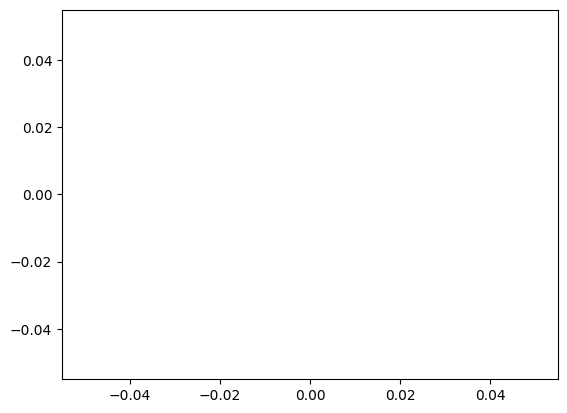

In [15]:
x01 = pos_encondings[0]
plt.plot(range(len(x01)),x01)
plt.show()

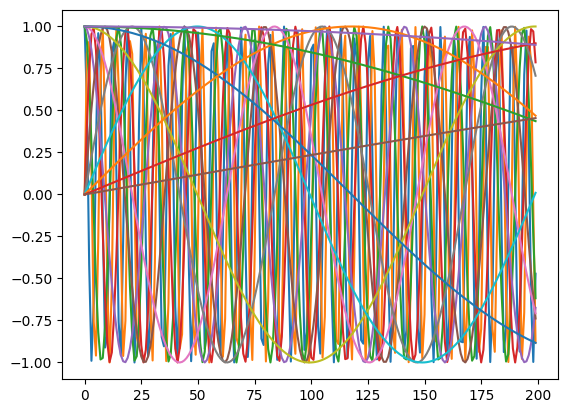

In [26]:
x01 = pos_encondings[0]
plt.plot(range(len(x01)),x01)
plt.show()